In [111]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dtm

In [112]:
df_wehter_Data =  pd.read_csv('weatherHistory.csv')
df_wehter_Data.head()

,FormattedDate,Summary,Precip Type,TemperatureC,ApparentTemperatureC,Humidity,WindSpeed(km/h),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibars),DailySummary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [113]:
df_wehter_Data.nunique()

FormattedDate            96429
Summary                     27
Precip Type                  2
TemperatureC              7574
ApparentTemperatureC      8984
Humidity                    90
WindSpeed(km/h)           2484
Wind Bearing(degrees)      360
Visibility(km)             949
Loud Cover                   1
Pressure(millibars)       4979
DailySummary               214
dtype: int64

In [114]:
summary = df_wehter_Data['Summary'].value_counts().reset_index()
summary.columns = ['Type of Weather', 'Count']
summary.head()

,Type of Weather,Count
0,Partly Cloudy,31733
1,Mostly Cloudy,28094
2,Overcast,16597
3,Clear,10890
4,Foggy,7148


In [115]:
df_wehter_Data.isna().sum()

FormattedDate              0
Summary                    0
Precip Type              517
TemperatureC               0
ApparentTemperatureC       0
Humidity                   0
WindSpeed(km/h)            0
Wind Bearing(degrees)      0
Visibility(km)             0
Loud Cover                 0
Pressure(millibars)        0
DailySummary               0
dtype: int64

In [116]:
df_wehter_Data['Precip Type'].fillna("rain", inplace=True)
df_wehter_Data.isna().sum()

FormattedDate            0
Summary                  0
Precip Type              0
TemperatureC             0
ApparentTemperatureC     0
Humidity                 0
WindSpeed(km/h)          0
Wind Bearing(degrees)    0
Visibility(km)           0
Loud Cover               0
Pressure(millibars)      0
DailySummary             0
dtype: int64

In [117]:
df_wehter_Data.dtypes

FormattedDate             object
Summary                   object
Precip Type               object
TemperatureC             float64
ApparentTemperatureC     float64
Humidity                 float64
WindSpeed(km/h)          float64
Wind Bearing(degrees)      int64
Visibility(km)           float64
Loud Cover                 int64
Pressure(millibars)      float64
DailySummary              object
dtype: object

In [118]:
df_wehter_Data['FormattedDate'] = pd.to_datetime(df_wehter_Data.FormattedDate, format='%Y-%m-%d %H:%M:%S', errors='coerce', utc=True)
df_wehter_Data.dtypes

FormattedDate            datetime64[ns, UTC]
Summary                               object
Precip Type                           object
TemperatureC                         float64
ApparentTemperatureC                 float64
Humidity                             float64
WindSpeed(km/h)                      float64
Wind Bearing(degrees)                  int64
Visibility(km)                       float64
Loud Cover                             int64
Pressure(millibars)                  float64
DailySummary                          object
dtype: object

In [119]:
df_wehter_Data['Year'] = df_wehter_Data['FormattedDate'].dt.year
grp_weather_data = df_wehter_Data.groupby('Year', as_index=False).max()
grp_weather_data.head(20)

,Year,FormattedDate,Summary,Precip Type,TemperatureC,ApparentTemperatureC,Humidity,WindSpeed(km/h),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibars),DailySummary
0,2005,2005-12-31 23:00:00+00:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140,9.982,0,1016.66,Mostly cloudy throughout the day.
1,2006,2006-12-31 23:00:00+00:00,Windy and Partly Cloudy,snow,34.005556,36.400000,1.00,45.9333,359,16.100,0,1045.14,Partly cloudy until night.
2,2007,2007-12-31 23:00:00+00:00,Windy and Partly Cloudy,snow,39.905556,38.377778,1.00,63.8526,359,16.100,0,1041.65,Partly cloudy until night.
3,2008,2008-12-31 23:00:00+00:00,Windy and Partly Cloudy,snow,37.755556,36.855556,1.00,55.9314,359,16.100,0,1046.38,Partly cloudy until night.
4,2009,2009-12-31 23:00:00+00:00,Windy and Partly Cloudy,snow,36.111111,36.922222,1.00,48.3000,359,16.100,0,1042.04,Partly cloudy until night.
5,2010,2010-12-31 23:00:00+00:00,Windy and Partly Cloudy,snow,34.927778,38.116667,1.00,46.2070,359,16.100,0,1037.85,Partly cloudy until night.
6,2011,2011-12-31 23:00:00+00:00,Windy and Partly Cloudy,snow,37.800000,37.716667,1.00,49.3948,359,16.100,0,1041.14,Partly cloudy until night.
7,2012,2012-12-31 23:00:00+00:00,Windy and Partly Cloudy,snow,38.861111,37.883333,1.00,45.0800,359,16.100,0,1037.10,Partly cloudy until night.
8,2013,2013-12-31 23:00:00+00:00,Windy and Partly Cloudy,snow,37.872222,39.344444,1.00,50.1354,359,16.100,0,1041.93,Partly cloudy until night.
9,2014,2014-12-31 23:00:00+00:00,Windy and Partly Cloudy,snow,33.911111,35.094444,1.00,54.8849,359,16.100,0,1039.13,Windy in the afternoon.


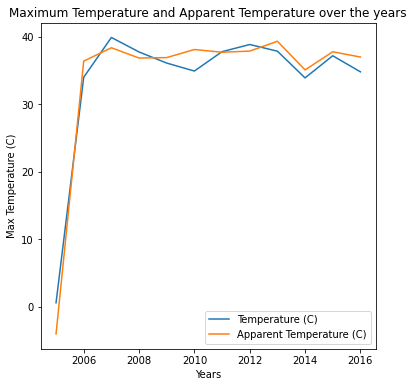

In [120]:
plt.figure(figsize=(6,6))
plt.plot(grp_weather_data['Year'],grp_weather_data['TemperatureC'], label = 'Temperature (C)')
plt.plot(grp_weather_data['Year'],grp_weather_data['ApparentTemperatureC'], label = 'Apparent Temperature (C)')
plt.legend()
plt.title('Maximum Temperature and Apparent Temperature over the years')
plt.xlabel('Years')
plt.ylabel('Max Temperature (C)')
plt.show()

In [121]:
count_Rain = df_wehter_Data[df_wehter_Data['Precip Type'] == 'rain'].value_counts().sum()
count_Snow = df_wehter_Data[df_wehter_Data['Precip Type'] == 'snow'].value_counts().sum()
print('total rain Value: ',count_Rain)
print('total snow Value: ',count_Snow)

total rain Value:  85741
total snow Value:  10712


In [129]:
grp_Summary_db = df_wehter_Data.groupby('Summary')
grp_Summary_db.head()

,FormattedDate,Summary,Precip Type,TemperatureC,ApparentTemperatureC,Humidity,WindSpeed(km/h),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibars),DailySummary,Year
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,2006
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,2006
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,2006
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,2006
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95323,2016-10-21 21:00:00+00:00,Rain,rain,9.738889,9.738889,0.96,4.2826,286,4.6529,0,1014.10,Rain throughout the day.,2016
95324,2016-10-21 22:00:00+00:00,Rain,rain,9.288889,8.244444,0.95,7.7280,314,4.4919,0,1014.09,Rain until morning.,2016
95325,2016-10-21 23:00:00+00:00,Rain,rain,8.738889,6.994444,0.95,10.8192,316,3.1395,0,1014.12,Rain until morning.,2016
95326,2016-10-22 00:00:00+00:00,Rain,rain,8.205556,6.105556,0.95,12.2843,314,5.5062,0,1014.19,Rain until morning.,2016
